# Roadmap
- Vectorize loss/grad
- Variable learning rate
- Compare to Weston paper
- Final code brush-up
- Overleaf prepare
- NTH: Kernel function

# Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Classifier

In [46]:
class LinearSVM(object):
    
    def __init__(self, X, y, reg=1e-5, delta=1.0, learning_rate=1e-3, num_iters=100):
        num_train, dim = X.shape
        num_classes = len(np.unique(y))
        
        self.W = 0.001 * np.random.randn(dim, num_classes)
        self.reg = reg
        self.delta = delta
        
        for it in range(num_iters):
            #train_indices = np.random.choice(num_train, 100) # stochastic gradient descent
            self.W -= learning_rate * self.grad(X, Y)
            if it % 100 == 0:
                print(f'iteration {it} / {num_iters}: neo loss {self.loss(X, Y)}')
    
    def loss(self, X, Y):
        # Data loss
        data_loss = 0.0
        for i in range(len(X)):
            scores = self.W.dot(X[i])
            correct_class_score = scores[Y[i]]
            for j in range(len(self.W)):
                if Y[i] != j:
                    data_loss += max(0, scores[j] - correct_class_score + self.delta)
        data_loss /= float(len(X))
        # Total loss
        return data_loss + self.reg * np.sum(self.W * self.W)

    def grad(self, X, Y):
        # Data loss
        data_loss_gradient = np.zeros(self.W.shape)
        for i in range(len(X)):
            scores = self.W.dot(X[i])
            correct_class_score = scores[Y[i]]
            for j in range(len(self.W)):
                if Y[i] != j:
                    if scores[j] - correct_class_score + self.delta > 0:
                        data_loss_gradient[j] += X[i]
                        data_loss_gradient[Y[i]] -= X[i]
        data_loss_gradient /= float(len(X))
        # Total loss
        return data_loss_gradient + self.reg * (2 * self.W)
    
    def predict(self, X):
        scores = self.W.dot(X.T).T
        return np.argmax(scores, axis=1)
    
    #def svm_loss_vectorized(self, W, X, y, reg):
        #loss = 0.0
        #dW = np.zeros(W.shape)
        #num_train = X.shape[0]

        #s = X.dot(W)

        #Getting the correct scores
        #correct_score = s[list(range(num_train)),y]
        #correct_score = correct_score.reshape(num_train,-1)

        #Now adding the margin and subtracting the scores
        # sj - syi +1
        #s += 1-correct_score

        #Making all the correct scores to zero as we find the max value in the loss, and the correct scores
        #don't contribute to the loss function.
        #s[list(range(num_train)),y] = 0
        #loss = np.sum(np.fmax(s,0))/num_train

        #adding the L2 regularization term
        #loss += reg * np.sum(W * W)

        #Now calculating the gradient.
        #X_mask = np.zeros(s.shape) #Binarize the margins.
        #X_mask[ s > 0] = 1 
        #X_mask[np.arange(num_train),y] = -np.sum(X_mask,axis = 1)
        #dW = X.T.dot(X_mask)
        #dW = dW / num_train

        #Left with only the regularization term.
        #dW += 2 * reg * W 

        #return loss, dW

# Sampling

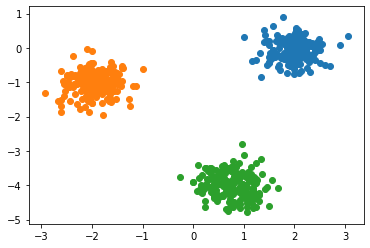

In [5]:
# Parameters
N_1 = 200
MU_1 = [2.0, -0.1]
SIGMA_1 = np.eye(2) * 0.1
N_2 = 200
MU_2 = [-2.0, -1.0]
SIGMA_2 = np.eye(2) * 0.1
N_3 = 200
MU_3 = [0.75, -4.0]
SIGMA_3 = np.eye(2) * 0.1

# Sample
X_1 = np.random.multivariate_normal(MU_1, SIGMA_1, N_1)
X_2 = np.random.multivariate_normal(MU_2, SIGMA_2, N_2)
X_3 = np.random.multivariate_normal(MU_3, SIGMA_3, N_3)

# Unify
X = np.vstack( (X_1, X_2, X_3) )
Y = np.array([0]*N_1 + [1]*N_2 + [2]*N_3)

# Append bias
X = np.hstack( (X, np.ones((X.shape[0], 1))) )

# Invariants
assert(len(X) == len(Y))
assert(X.shape[1] == 3)

# Plot
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()

# Training

In [47]:
svm = LinearSVM(X, Y, learning_rate=1e-7, reg=5e4, num_iters=500)

iteration 0 / 500: neo loss 2.4874770835661737
iteration 100 / 500: neo loss 2.0652401662083615
iteration 200 / 500: neo loss 2.0086690013077337
iteration 300 / 500: neo loss 2.001089615028005
iteration 400 / 500: neo loss 2.000074131318632


# Prediction

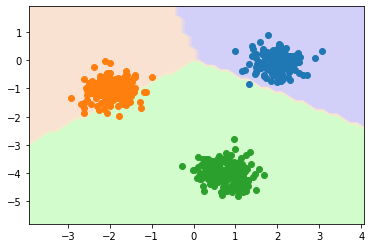

In [48]:
nx = 50
ny = 50

xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, nx),
                     np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, ny))

X_pred = np.hstack((xx.reshape((-1, 1)), yy.reshape((-1, 1)), np.ones((nx*ny, 1))))
Y_pred = svm.predict(X_pred)

cm = LinearSegmentedColormap.from_list('multi-classify', [(0.8,0.8,1), (1,0.9,0.8), (0.8, 1, 0.8)])

plt.contourf(xx, yy, Y_pred.reshape((ny, nx)), cmap=cm)
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()